<h2 align="center">Лабораторна робота №3</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Застосування алгортмів і методів ройового інтелекту до розв'язування оптимізаційних задач з обмеженнями у вигляді диференціальних рівнянь та їх систем".</p>
<p><b><i>Мета роботи:</i></b> опанувати принципи роботи наведених у роботі алгоритмів ройового інтелекту (метод зозулі; метод кажанів), опис яких наведено у даній роботі. Розробити відповідне програмне забезпечення знаходження оптимальних розв'язків наведених у роботі задач.</p>

## Завдання до лабораторної роботи

- Ознайомитись з теоретичними відомостями до кожного з розглянутих методів (метод пошуку екстремуму зграєю зозуль, метод пошуку екстремуму зграєю кажанів).
- Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування знаходження глобального екстремуму функцій з четвертого розділу роботи (для функції Растринга взяти $n=20$). Протестувати кожен з розглянутих методів на даних функціях. Подати результати тестування у вигляді графіків, як і у попередніх роботах. Кількість запусків програмного застосунку для 2-х алгоритмів будь-яке (на вибір студента).
- Модивфікувати відповідні програми для знаходження розв'язку будь-якої задачі з підрозділу 5.1. Показати динаміку збіжності обраного методу на обраній задачі, навести графічно відповідний розв'язок задач та числові параметри, які демонструють достатню збіжність методу на задачі. У якості цільової функції взяти:
    - $f(\alpha)=|x(t=b;\alpha) - B|$
    - $f(\alpha)=(x(t=b;\alpha) - B)^2$,
        де $b$ - значення аргументу на границі, $B$ - потрібне значення функції на границі $t=b$ для деякого значення $\alpha$.
Оцінити графічно, наскільки ефективно працюють методи для різних цільових функцій.
- Модифікувати відповіді програми для знаходження розв'язку будь-якої задачі з підрозділу 5.2. Показати динаміку збіжності обраного методу на обраній задачі, навести графічно відповідний розв'язок задач та числові параметри, які демонструють достатню збіжність методу на задачі. У якості цільової функції взяти:
    - $f(\alpha;\beta)=m|x(b;\alpha;\beta)-A|+n|y(b;\alpha;\beta)-B|;$
    - $f(\alpha;\beta)=m(x(b;\alpha;\beta)-A)^2+n(y(b;\alpha;\beta)-B)^2$, де $b$ - значення аргументу на границі; $A$ - потрібне значення функції на границі $t=b$ функції $x(t)$ для пари $(\alpha;\beta)$; $B$ - потрібне значення функції на границі $t=b$ функції $y(t)$ для пари $(\alpha;\beta); m\in\R^+,n\in\R^+$.
    - $f(\alpha;\beta)=\max(m|x(b;\alpha;\beta) - A|; n|y(b;\alpha;\beta)-B|), де $b$ - значення аргументу на границі; $A$ - потрібне значення функції на границі $t=b$ функції $x(t)$ для пари $(\alpha;\beta)$; $B$ - потрібне значення функції на границі $t=b$ функції $y(t)$ для пари $(\alpha;\beta); m\in\R^+,n\in\R^+$.
- Оцінити графічно, наскільки ефективно працюють методи для різних цільових функцій.
- Зробит висновки до отриманих результатів

In [4]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import Swarm as sw
import numpy as np

### Rastring

In [18]:
def Rastring(x):
    A = 10    
    return A*x.shape[0] + np.sum(np.pow(x, 2) - A*np.cos(2*np.pi*x))

In [21]:
r_c, _, _ = sw.Cuckoo(Rastring, 1000, 250, 20, [-5.12]*20, [5.12]*20, .8)
r_b, _, _ = sw.Bat(Rastring, 1000, 250, 20, [-5.12]*20, [5.12]*20)

C:\Users\berku\AppData\Local\Temp\ipykernel_28580\1672660035.py:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, frame)


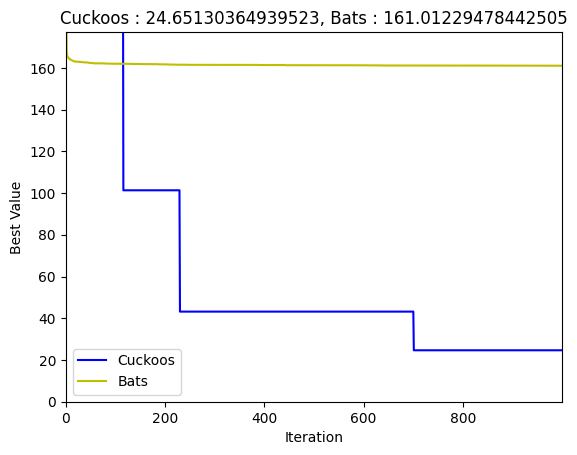

In [22]:
fig, ax = plt.subplots()
xdata, y1data, y2data = [], [], []
ln1, = plt.plot([], [], 'b-', label='Cuckoos')
ln2, = plt.plot([], [], 'y-', label='Bats')

ax.set_xlabel('Iteration')
ax.set_ylabel('Best Value')
ax.legend()

def init():
    ax.set_title(f' ')
    return ln1, ln2,

def update(frame):
    xdata.append(frame)
    y1data.append(r_c[frame])
    y2data.append(r_b[frame])
    
    if frame != 0:
        ax.set_title(f'Cuckoos : {min(r_c[:frame])}, Bats : {min(r_b[:frame])}')
    
    ax.set_xlim(0, frame)
    
    ax.set_ylim(0, 1.1 * max(r_c[frame], r_b[frame]))

    ln1.set_data(xdata, y1data)
    ln2.set_data(xdata, y2data)
    return ln1, ln2,


# Створення анімації
ani = FuncAnimation(fig, update, frames=range(len(r_c)), init_func=init, blit=True, interval=50)
ani.save(f"R20.gif", fps = 12)

### 5.1

$\begin{cases} 
x'=2x^2-25t^2-sin(xyt), \\ 
y"=1-4cos(x't),
\end{cases} \\
x(1)=2, y(1)=1, y'(3)=-1, t \in [1;3]. \\$


$z = y' \\
\begin{cases} 
x'=2x^2-25t^2-sin(xyt), \\ 
z'=1-4cos(x't), \\
y'=z\\
\end{cases} \\$

$\begin{cases} 
\frac{x_{k+1} - x_k}{h}=2x_k^2-25t_k^2-sin(x_ky_kt_k), \\ 
\frac{z_{k+1} - z_k}{h}=1-4cos(\frac{x_{k+1} - x_k}{h}\cdot t), \\
\frac{y_{k+1} - y_k}{h}=z_k\\
\end{cases} \\$

$\begin{cases} 
x_{k+1}=(2x_k^2-25t_k^2-sin(x_ky_kt_k))\cdot h + x_k, \\ 
z_{k+1}=(1-4cos(\frac{x_{k+1} - x_k}{h}\cdot t_k))\cdot h + z_k, \\
y_{k+1}=z_k\cdot h + y_k\\
\end{cases} \\
x_0=2, y_0=1, z_N=-1, t \in [1;3],$

$J(\alpha)=(y(\alpha, 3) + 1)^2 \rightarrow min,\space або \\
J(\alpha)=|y(\alpha, 3) + 1| \rightarrow min$

In [5]:
a, b = 1, 3
n = 1000
t = np.linspace(a, b, n)
alpha = np.linspace(-3, 3, 100)
h = (b-a)/n

x, y, z = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
x[0] = 2
y[0] = 1

y_q = []
y_a = []

for a in alpha:
    z[0] = a
    for i in range(t.shape[0]-1):
        x[i+1] = (2*x[i-1]**2 - 25*t[i]**2 - np.sin(x[i]*y[i]*t[i]))*h + x[i]
        y[i+1] = (1 - 4*np.cos(x[i+1]*t[i]))*h + z[i]
        z[i+1] = z[i]*h + y[i]
    y_q.append((y[-1] + 1)**2)
    y_a.append(abs(y[-1] + 1))

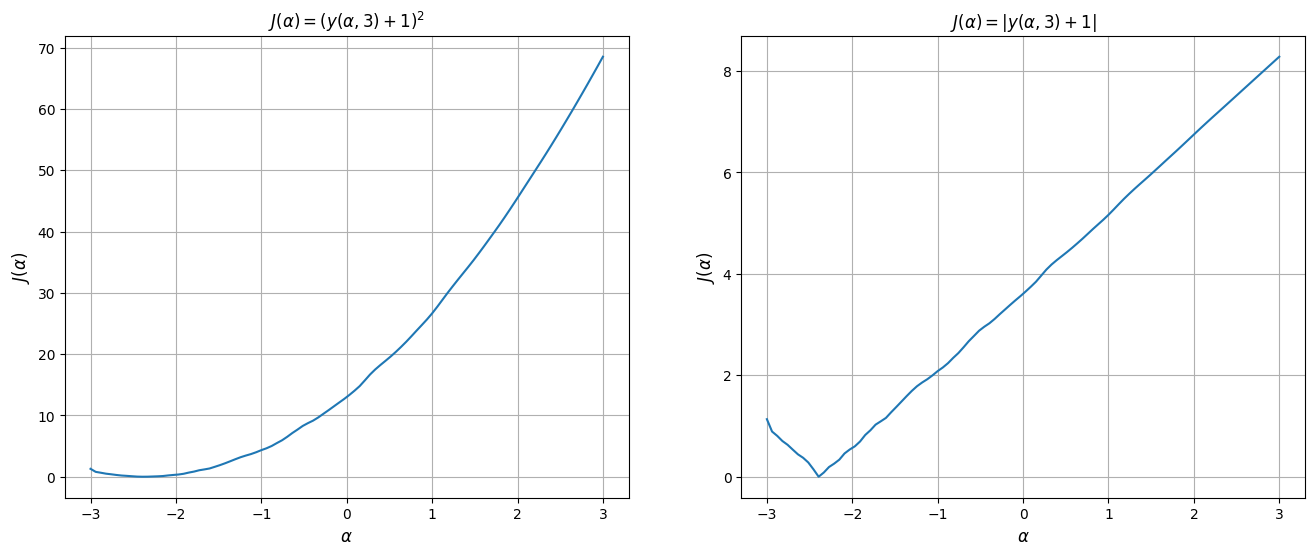

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(alpha, y_q)
ax[0].set_xlabel(r"$\alpha$", fontsize=12)
ax[0].set_ylabel(r"$J(\alpha)$", fontsize=12)
ax[0].set_title(r"$J(\alpha)=(y(\alpha, 3)+1)^2$", fontsize=12)
ax[0].grid()

ax[1].plot(alpha, y_a)
ax[1].set_xlabel(r"$\alpha$", fontsize=12)
ax[1].set_ylabel(r"$J(\alpha)$", fontsize=12)
ax[1].set_title(r"$J(\alpha)=|y(\alpha, 3)+1|$", fontsize=12)
ax[1].grid()
plt.show()

In [7]:
def linear_interpolation2d(alpha, y_points, x):
    n = len(alpha)
    for i in range(1, n):  # Start from 1 to avoid alpha[i-1] indexing issues
        if alpha[i] > x:
            return (x - alpha[i - 1]) / (alpha[i] - alpha[i - 1]) * (y_points[i] - y_points[i - 1]) + y_points[i - 1]
    # If x is outside the interpolation range, return boundary values
    if x <= alpha[0]:
        return y_points[0]
    elif x >= alpha[-1]:
        return y_points[-1]
    return None  # Fallback in case of unexpected input

def y_abs(x):
    res = [linear_interpolation2d(alpha, y_a, x_) for x_ in x]
    
    # Ensure no None values are returned
    if any(val is None for val in res):
        raise ValueError(f"Interpolation failed for input: {x}")

    return res[0] if len(res) == 1 else res

def y_square(x):
    res = [linear_interpolation2d(alpha, y_q, x_) for x_ in x]
    
    # Ensure no None values are returned
    if any(val is None for val in res):
        raise ValueError(f"Interpolation failed for input: {x}")

    return res[0] if len(res) == 1 else res

In [8]:
y_abs([-3])

np.float64(1.1348069395517486)

In [9]:
yq_c, yq_cp, yq_cswrm = sw.Cuckoo(y_square, 100, 25, 1, [-3], [3], .8)
yq_b, yq_bp, yq_bswrm = sw.Bat(y_square, 100, 25, 1, [-3], [3])

ya_c, ya_cp, ya_cswrm = sw.Cuckoo(y_abs, 100, 25, 1, [-3], [3], .8)
ya_b, ya_bp, ya_bswrm = sw.Bat(y_abs, 100, 25, 1, [-3], [3])

In [10]:
ya_b[-5:]

[np.float64(0.0009461798746270022),
 np.float64(0.0009461798746270022),
 np.float64(0.0009461798746270022),
 np.float64(0.0009461798746270022),
 np.float64(0.0009461798746270022)]

In [11]:
ya_bp[-10:]

[array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081]),
 array([-2.39385081])]

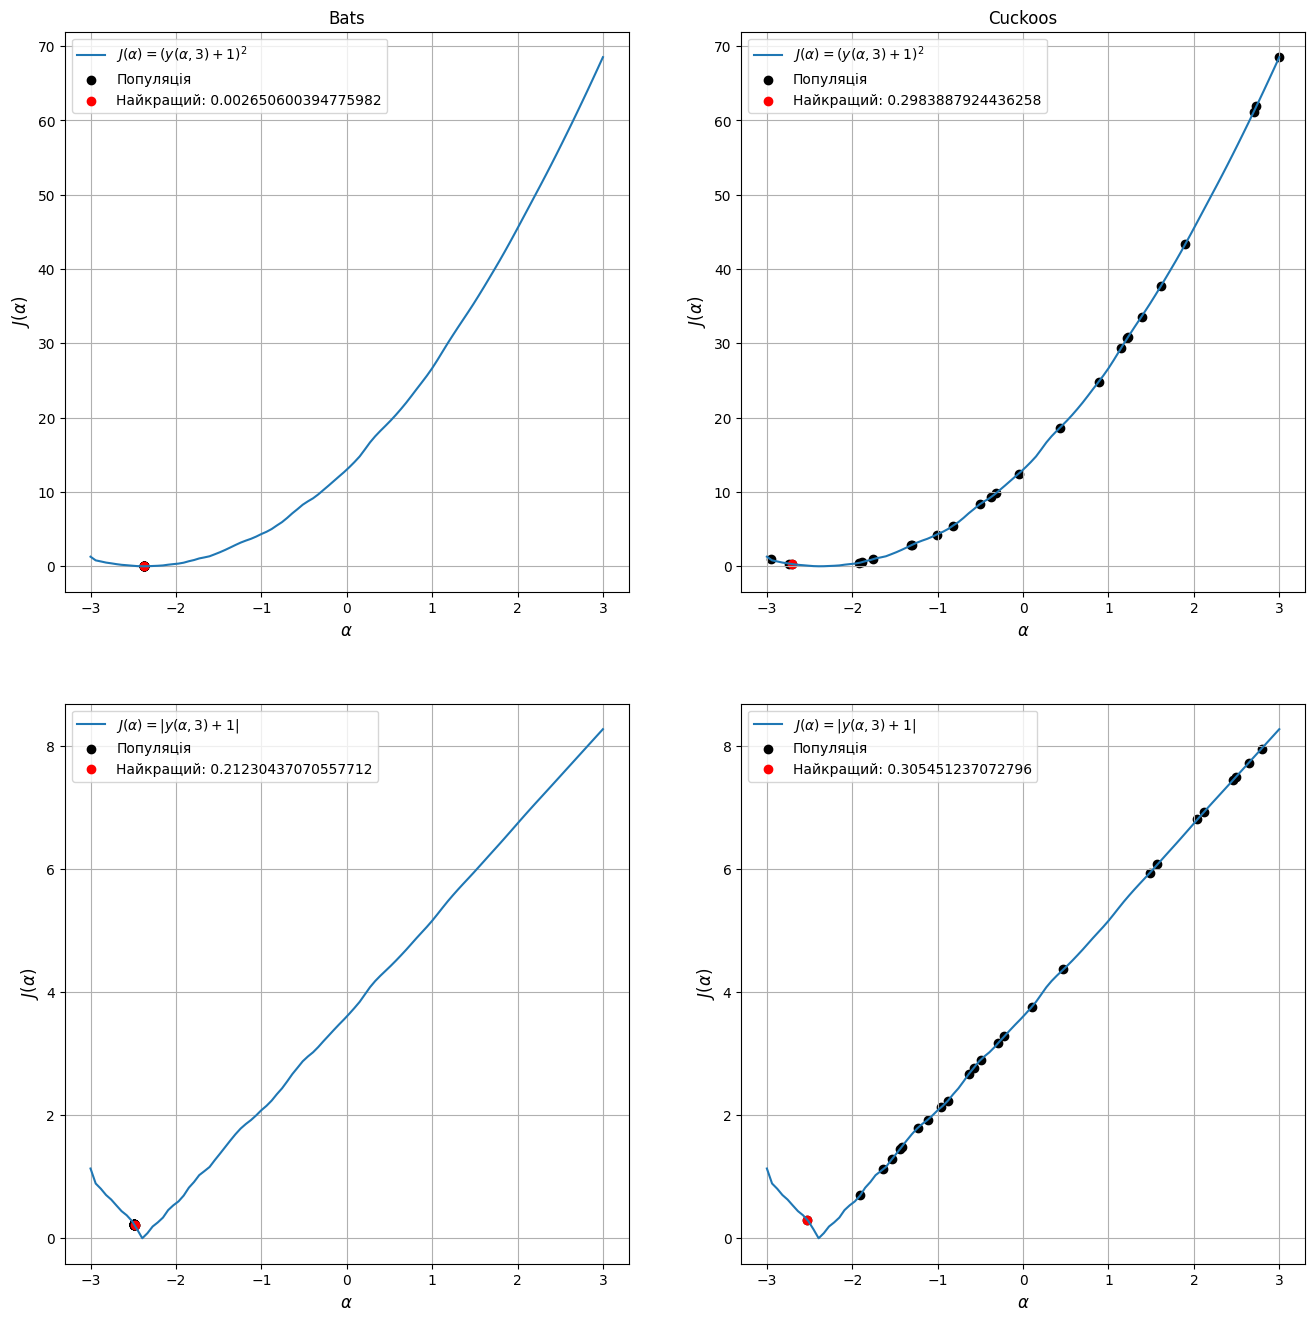

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))


def update(frame):
    ax[0, 0].clear()
    ax[0, 1].clear()
    ax[1, 0].clear()
    ax[1, 1].clear()
    
    #
    ax[0, 0].plot(alpha, y_q, label=r"$J(\alpha)=(y(\alpha, 3)+1)^2$")
    
    ax[0, 0].scatter(yq_bswrm[frame][..., 0], y_square(yq_bswrm[frame][..., 0]), c="black", label=f"Популяція")
    ax[0, 0].scatter(yq_bp[frame][0], yq_b[frame], c="r", label=f"Найкращий: {yq_b[frame]}")
    ax[0, 0].legend()
    
    ax[0, 0].set_xlabel(r"$\alpha$", fontsize=12)
    ax[0, 0].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[0, 0].set_title("Bats", fontsize=12)
    ax[0, 0].grid()
    
    #
    ax[0, 1].plot(alpha, y_q, label=r"$J(\alpha)=(y(\alpha, 3)+1)^2$")
    
    ax[0, 1].scatter(yq_cswrm[frame][..., 0], y_square(yq_cswrm[frame][..., 0]), c="black", label=f"Популяція")
    ax[0, 1].scatter(yq_cp[frame][0], yq_c[frame], c="r", label=f"Найкращий: {yq_c[frame]}")
    ax[0, 1].legend()
    
    ax[0, 1].set_xlabel(r"$\alpha$", fontsize=12)
    ax[0, 1].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[0, 1].set_title("Cuckoos", fontsize=12)
    ax[0, 1].grid()

    #
    ax[1, 0].plot(alpha, y_a, label=r"$J(\alpha)=|y(\alpha, 3)+1|$")
    
    ax[1, 0].scatter(ya_bswrm[frame][..., 0], y_abs(ya_bswrm[frame][..., 0]), c="black", label=f"Популяція")
    ax[1, 0].scatter(ya_bp[frame][0], ya_b[frame], c="r", label=f"Найкращий: {ya_b[frame]}")
    ax[1, 0].legend()
    
    ax[1, 0].set_xlabel(r"$\alpha$", fontsize=12)
    ax[1, 0].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[1, 0].grid()
    
    #
    ax[1, 1].plot(alpha, y_a, label=r"$J(\alpha)=|y(\alpha, 3)+1|$")
    
    ax[1, 1].scatter(ya_cswrm[frame][..., 0], y_abs(ya_cswrm[frame][..., 0]), c="black", label=f"Популяція")
    ax[1, 1].scatter(ya_cp[frame][0], ya_c[frame], c="r", label=f"Найкращий: {ya_c[frame]}")
    ax[1, 1].legend()
    
    ax[1, 1].set_xlabel(r"$\alpha$", fontsize=12)
    ax[1, 1].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[1, 1].grid()
    
    
    
    return [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]

# Створення анімації з blit=True
ani = FuncAnimation(
    fig, 
    update, 
    frames=range(len(yq_c)),
    interval=50
)

# Збереження GIF (потрібен ffmpeg або imagemagick)
ani.save("2D.gif", fps=12)

### 5.2

$
\begin{cases} 
x"+\frac{sin(y+tx)}{(x^2+y')^2+1}-cos(xy) = 0, \\ 
y"-\frac{y'}{t^2}+cos(3x-y')-\frac{x^2}{t^4}=6t-\frac{1}{t^4}+cos(5)-4,
\end{cases} \\
x(1)=2, y(1)=-1, x(3)=10, y(3)=21, t \in [1; 3].
$

$
z = y', \space g=x' \\
\begin{cases} 
g'+\frac{sin(y+tx)}{(x^2+z)^2+1}-cos(xy) = 0, \\ 
z'-\frac{z}{t^2}+cos(3x-z)-\frac{x^2}{t^4}=6t-\frac{1}{t^4}+cos(5)-4,
\end{cases} \\$

$
\begin{cases} 
\frac{g_{k+1}-g_k}{h} = cos(x_{k}y_{k})-\frac{sin(y_{k}+t_{k}x_{k})}{(x^2+z)^2+1} , \\ 
\frac{z_{k+1}-z_k}{h} = 6t-\frac{1}{t^4}+cos(5)-4+\frac{z}{t^2}-cos(3x-z)+\frac{x^2}{t^4}, \\
\frac{y_{k+1}-y_k}{h} = z_k, \\
\frac{x_{k+1}-x_k}{h} = g_k,
\end{cases} \\
$

$
\begin{cases} 
g_{k+1} = (cos(x_{k}y_{k})-\frac{sin(y_{k}+t_{k}x_{k})}{(x^2+z)^2+1})\cdot h + g_k , \\ 
z_{k+1} = (6t_k-\frac{1}{t_k^4}+cos(5)-4+\frac{z_k}{t_k^2}-cos(3x_k-z_k)+\frac{x_k^2}{t_k^4})\cdot h + z_k, \\
y_{k+1} = z_k\cdot h + y_k, \\
x_{k+1} = g_k \cdot h + x_k,
\end{cases} \\
x_0=2, \space y_0=-1, \space g_N=10, \space z_N=21, \space t \in [1;3].
$

In [13]:
a, b = 1, 3
n = 500
t = np.linspace(a, b, n)
alpha = np.linspace(-8, 8, 100)
h = (b-a)/n

x, y, z, g = np.zeros_like(t), np.zeros_like(t), \
    np.zeros_like(t), np.zeros_like(t)

y_qq = np.zeros((alpha.shape[0], alpha.shape[0]))
y_max = np.zeros((alpha.shape[0], alpha.shape[0]))
y_aa = np.zeros((alpha.shape[0], alpha.shape[0]))

x[0] = 2
y[0] = -1

for a1 in range(alpha.shape[0]):
    for a2 in range(alpha.shape[0]):
        g[0], z[0] = alpha[a1], alpha[a2]
        
        for i in range(t.shape[0]-1):
            x[i+1] = g[i]*h + x[i]
            y[i+1] = z[i]*h + y[i]
            g[i+1] = (np.cos(x[i]*y[i]) - np.sin(y[i]+t[i]*x[i])/((x[i]**2+z[i])**2+1))*h + g[i]
            z[i+1] = (6*t[i] - 1/(t[i]**4) + np.cos(5) - 4 + z[i]/(t[i]**2) - np.cos(3*x[i]-z[i])+(x[i]**2)/(t[i]**4))*h + z[i]
        y_qq[a1, a2] = (x[-1]-10)**2 + (y[-1]-21)**2
        y_max[a1, a2] = max(abs(x[-1]-10), abs(y[-1]-21))
        y_aa[a1, a2] = abs(x[-1]-10) + abs(y[-1]-21)

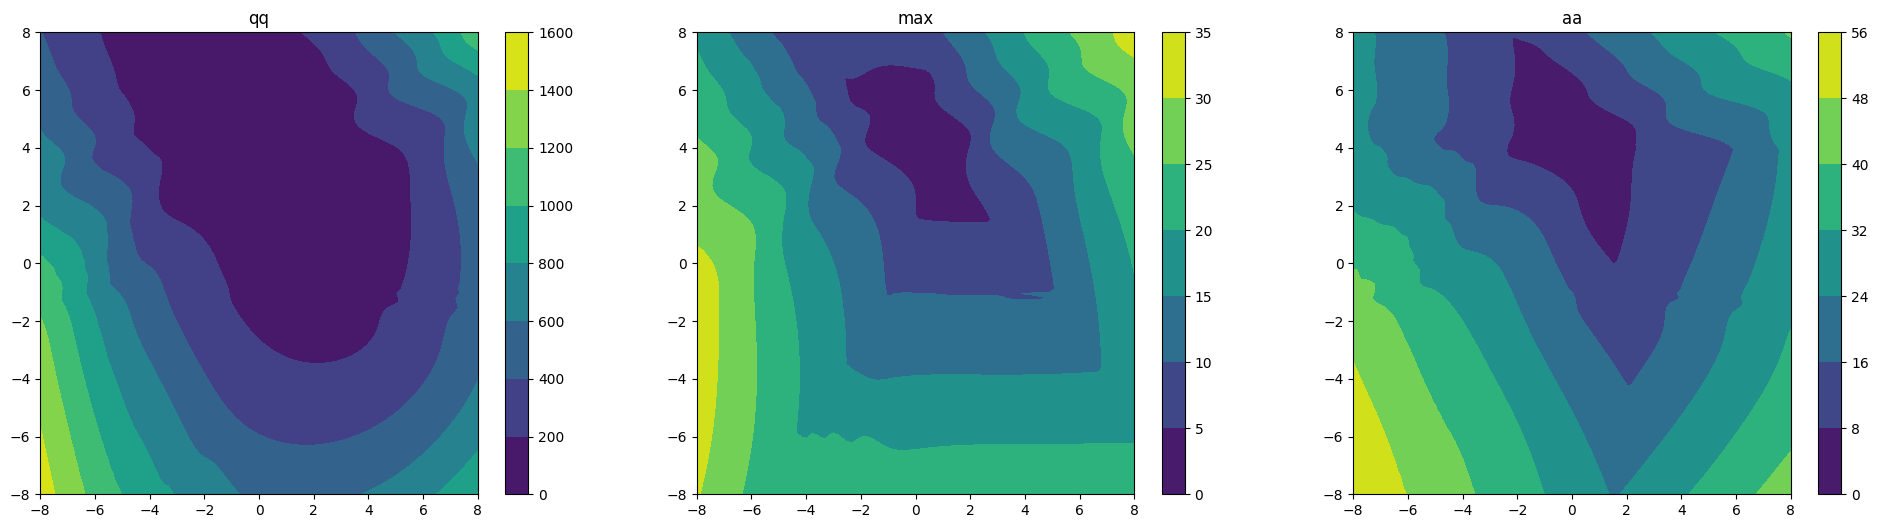

In [14]:
A1, A2 = np.meshgrid(alpha, alpha)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax00 = ax[0].contourf(A1, A2, y_qq)
ax[0].set_title("qq")
fig.colorbar(ax00)

ax01 = ax[1].contourf(A1, A2, y_max)
ax[1].set_title("max")
fig.colorbar(ax01)


ax11 = ax[2].contourf(A1, A2, y_aa)
ax[2].set_title("aa")
fig.colorbar(ax11)

In [15]:
# Дефініція цільової функції
def target_function(coords, mode='y_qq'):
    a, b = 1, 3
    n = 500
    t = np.linspace(a, b, n)
    h = (b - a) / n
    
    # Ініціалізація змінних
    x, y, z, g = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
    x[0] = 2
    y[0] = -1
    
    # Розпаковка координат
    alpha1, alpha2 = coords
    
    # Початкові значення
    g[0] = alpha1
    z[0] = alpha2
    
    # Чисельне інтегрування
    for i in range(t.shape[0] - 1):
        x[i + 1] = g[i] * h + x[i]
        y[i + 1] = z[i] * h + y[i]
        g[i + 1] = (np.cos(x[i] * y[i]) - np.sin(y[i] + t[i] * x[i]) / ((x[i] ** 2 + z[i]) ** 2 + 1)) * h + g[i]
        z[i + 1] = (6 * t[i] - 1 / (t[i] ** 4) + np.cos(5) - 4 + z[i] / (t[i] ** 2) - np.cos(3 * x[i] - z[i]) + (x[i] ** 2) / (t[i] ** 4)) * h + z[i]
    
    # Обчислення цільової функції
    if mode == 'y_qq':
        return (x[-1] - 10) ** 2 + (y[-1] - 21) ** 2  # Квадратичний критерій
    elif mode == 'y_max':
        return max(abs(x[-1] - 10), abs(y[-1] - 21))  # Максимальна відстань
    elif mode == 'y_aa':
        return abs(x[-1] - 10) + abs(y[-1] - 21)  # Абсолютна сума
    else:
        raise ValueError("Невідомий режим цільової функції: виберіть 'y_qq', 'y_max' або 'y_aa'")

def y_sqsq(x):
    return target_function(x, mode="y_qq")

def y_absabs(x):
    return target_function(x, mode="y_aa")

def y_maxmax(x):
    return target_function(x, mode="y_max")

In [16]:
yqq_c, yqq_cp, yqq_cswrm = sw.Cuckoo(y_sqsq, 100, 25, 2, [-8]*2, [8]*2, .8)
yqq_b, yqq_bp, yqq_bswrm = sw.Bat(y_sqsq, 100, 25, 2, [-8]*2, [8]*2)

ymm_c, ymm_cp, ymm_cswrm = sw.Cuckoo(y_maxmax, 100, 25, 2, [-8]*2, [8]*2, .8)
ymm_b, ymm_bp, ymm_bswrm = sw.Bat(y_maxmax, 100, 25, 2, [-8]*2, [8]*2)

yaa_c, yaa_cp, yaa_cswrm = sw.Cuckoo(y_absabs, 100, 25, 2, [-8]*2, [8]*2, .8)
yaa_b, yaa_bp, yaa_bswrm = sw.Bat(y_absabs, 100, 25, 2, [-8]*2, [8]*2)

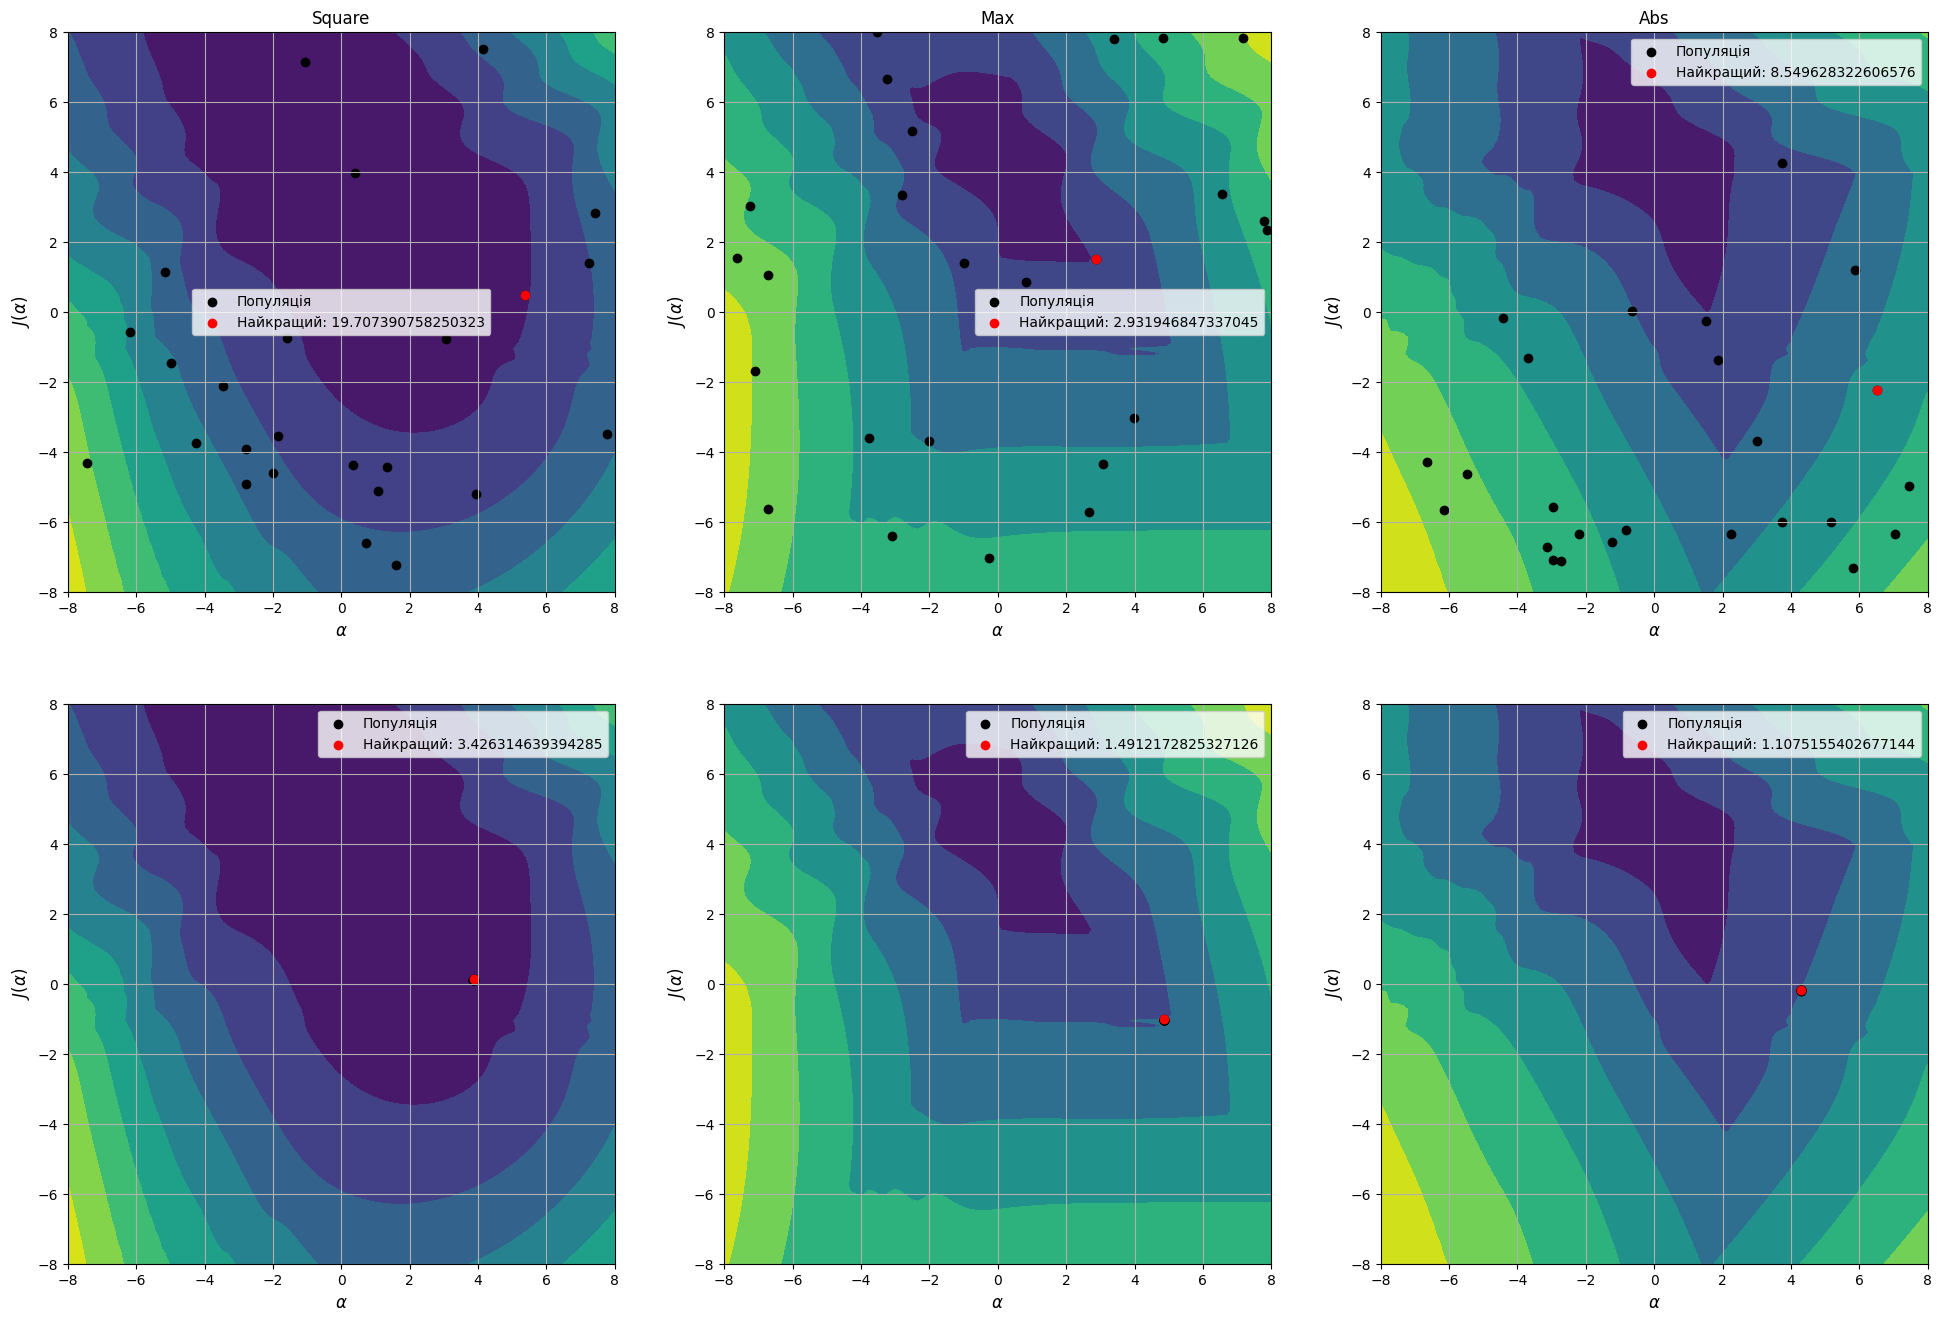

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(24, 16))


def update(frame):
    ax[0, 0].clear()
    ax[0, 1].clear()
    ax[0, 2].clear()
    ax[1, 0].clear()
    ax[1, 1].clear()
    ax[1, 2].clear()
    
    #
    ax[0, 0].contourf(A1, A2, y_qq)
    
    ax[0, 0].scatter(yqq_cswrm[frame][..., 0], yqq_cswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[0, 0].scatter(yqq_cp[frame][0], yqq_cp[frame][1], c="r", label=f"Найкращий: {yqq_c[frame]}")
    ax[0, 0].legend()
    
    ax[0, 0].set_xlabel(r"$\alpha$", fontsize=12)
    ax[0, 0].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[0, 0].set_title("Square", fontsize=12)
    ax[0, 0].grid()
    
    #
    ax[0, 1].contourf(A1, A2, y_max)
    
    ax[0, 1].scatter(ymm_cswrm[frame][..., 0], ymm_cswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[0, 1].scatter(ymm_cp[frame][0], ymm_cp[frame][1], c="r", label=f"Найкращий: {ymm_c[frame]}")
    ax[0, 1].legend()
    
    ax[0, 1].set_xlabel(r"$\alpha$", fontsize=12)
    ax[0, 1].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[0, 1].set_title("Max", fontsize=12)
    ax[0, 1].grid()

    #
    ax[0, 2].contourf(A1, A2, y_aa)
    
    ax[0, 2].scatter(yaa_cswrm[frame][..., 0], yaa_cswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[0, 2].scatter(yaa_cp[frame][0], yaa_cp[frame][1], c="r", label=f"Найкращий: {yaa_c[frame]}")
    ax[0, 2].legend()
    
    ax[0, 2].set_xlabel(r"$\alpha$", fontsize=12)
    ax[0, 2].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[0, 2].set_title("Abs", fontsize=12)
    ax[0, 2].grid()
    
    #
    #
    ax[1, 0].contourf(A1, A2, y_qq)
    
    ax[1, 0].scatter(yqq_bswrm[frame][..., 0], yqq_bswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[1, 0].scatter(yqq_bp[frame][0], yqq_bp[frame][1], c="r", label=f"Найкращий: {yqq_b[frame]}")
    ax[1, 0].legend()
    
    ax[1, 0].set_xlabel(r"$\alpha$", fontsize=12)
    ax[1, 0].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[1, 0].grid()
    
    #
    ax[1, 1].contourf(A1, A2, y_max)
    
    ax[1, 1].scatter(ymm_bswrm[frame][..., 0], ymm_bswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[1, 1].scatter(ymm_bp[frame][0], ymm_bp[frame][1], c="r", label=f"Найкращий: {ymm_b[frame]}")
    ax[1, 1].legend()
    
    ax[1, 1].set_xlabel(r"$\alpha$", fontsize=12)
    ax[1, 1].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[1, 1].grid()

    #
    ax[1, 2].contourf(A1, A2, y_aa)
    
    ax[1, 2].scatter(yaa_bswrm[frame][..., 0], yaa_bswrm[frame][..., 1], c="black", label=f"Популяція")
    ax[1, 2].scatter(yaa_bp[frame][0], yaa_bp[frame][1], c="r", label=f"Найкращий: {yaa_b[frame]}")
    ax[1, 2].legend()
    
    ax[1, 2].set_xlabel(r"$\alpha$", fontsize=12)
    ax[1, 2].set_ylabel(r"$J(\alpha)$", fontsize=12)
    ax[1, 2].grid()
    
    
    return [ax[0, 0], ax[0, 1], ax[1, 0], ax[1, 1]]

# Створення анімації з blit=True
ani = FuncAnimation(
    fig, 
    update, 
    frames=range(100),
    interval=50
)

# Збереження GIF (потрібен ffmpeg або imagemagick)
ani.save("3D.gif", fps=12)